# Lab Assigment 1 Q&A Candies
<p style="text-align:left;">
    José Pedro Cruz
    <span style="float:right;">
        up201504646
    </span>
</p>
<p style="text-align:left;">
    Martinho Figueiredo
    <span style="float:right;">
        up201506179
    </span>
</p>
<p style="text-align:left;">
    Nuno Nascimento
    <span style="float:right;">
        up201900000
    </span>
</p>

In [1]:
#imports and line magic to make the notebook work

%pip install --upgrade pip
%pip install opencv-python
%pip install matplotlib
%pip install sympy
%pip install pandas
%pip install ipympl



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import glob
from sympy import *
import pandas as pd

## Intrinsic calibration

Loading Image data/IntrinsicCalibration/calib_img_0.png


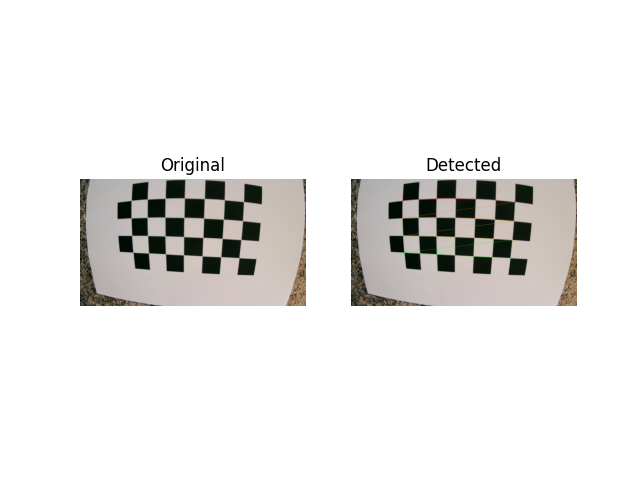

Loading Image data/IntrinsicCalibration/calib_img_1.png


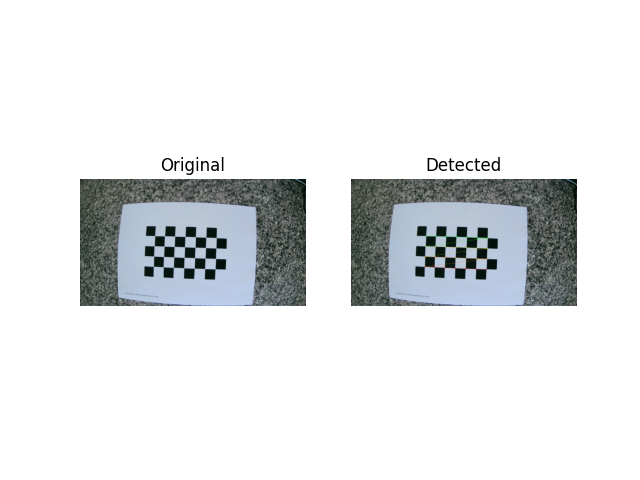

Loading Image data/IntrinsicCalibration/calib_img_2.png


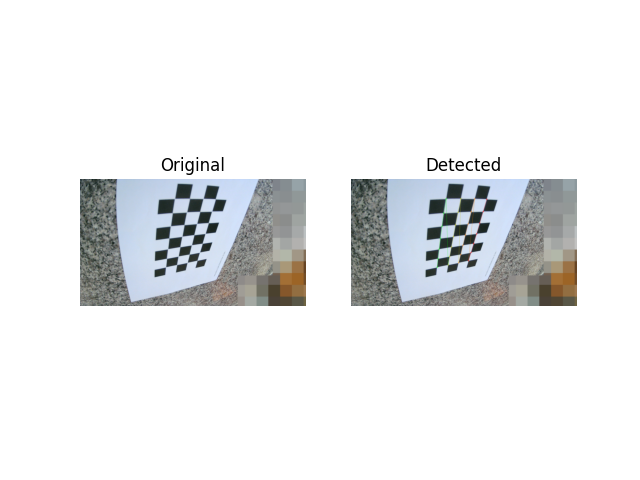

Loading Image data/IntrinsicCalibration/calib_img_3.png


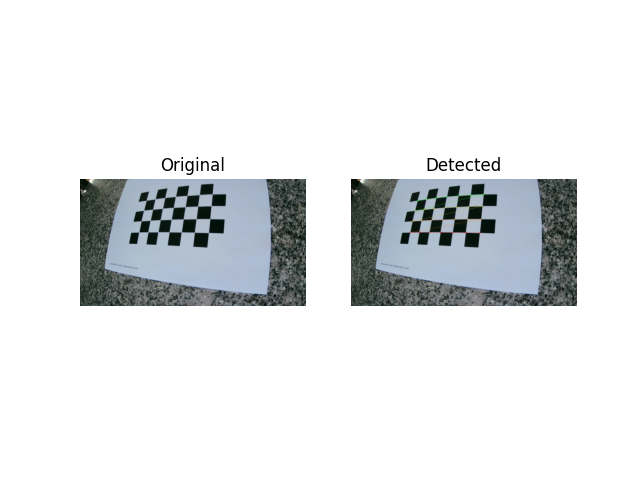

Loading Image data/IntrinsicCalibration/calib_img_4.png


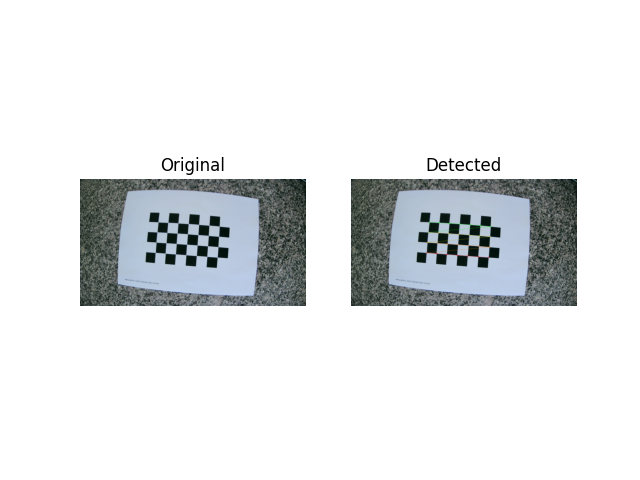

Loading Image data/IntrinsicCalibration/calib_img_5.png


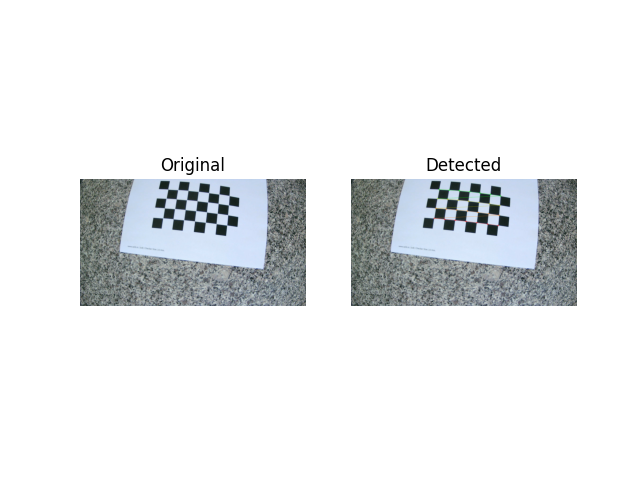

Loading Image data/IntrinsicCalibration/calib_img_6.png


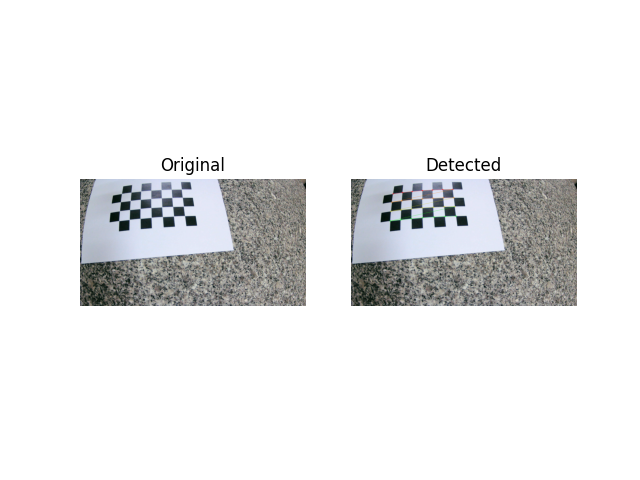

Loading Image data/IntrinsicCalibration/calib_img_7.png


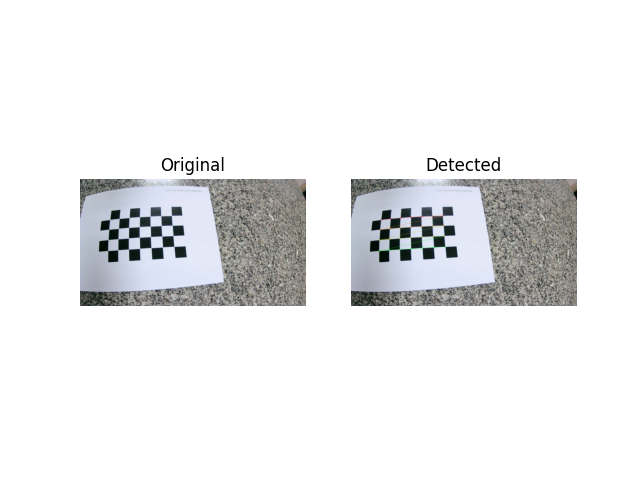

Loading Image data/IntrinsicCalibration/calib_img_8.png


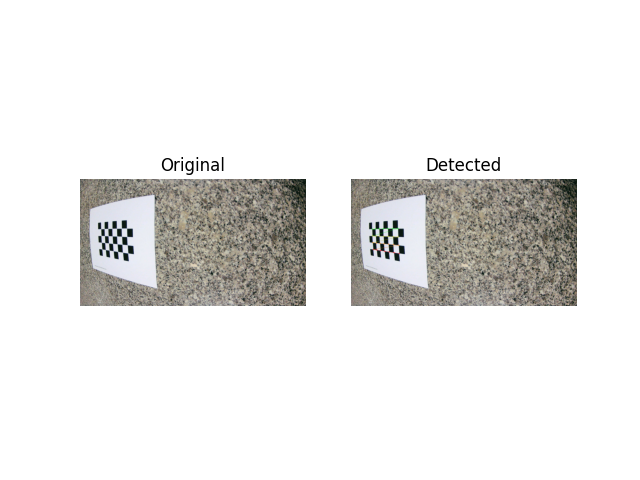

Loading Image data/IntrinsicCalibration/calib_img_9.png


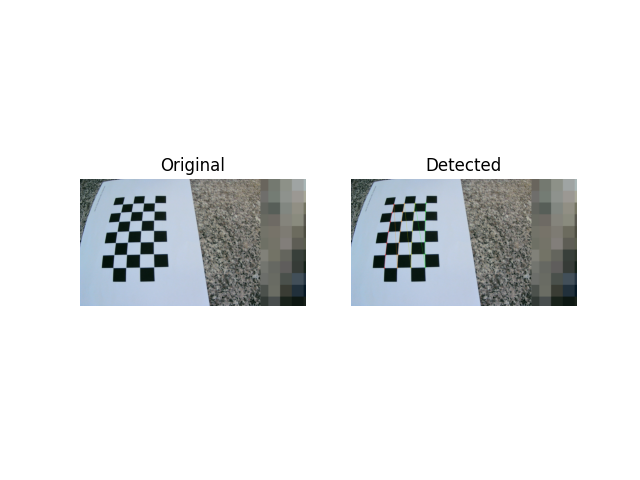

 Intrinsic Matrix :


NameError: name 'Symbol' is not defined

In [4]:
# tuple that says the grid size (note these are interior corners)
grid_size = (7,4) 

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((grid_size[1]*grid_size[0],3), np.float32)
objp[:,:2] = np.mgrid[0:grid_size[0],0:grid_size[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = sorted(glob.glob('data/IntrinsicCalibration/calib_img_[0-9].png'))

for fname in images:

    print(f"Loading Image {fname}")
    img = cv.imread(fname)
    
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCornersSB(gray, grid_size, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, grid_size, corners2, ret)
        
    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected')
    plt.show()



ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(f" Intrinsic Matrix :")
pprint(sympy.Matrix(mtx).applyfunc(lambda x: Symbol('{:.3f}'.format(x))))

#print(f"\n Rotation Matrix : ")
#pprint(sympy.Matrix(rvecs))
#print(f"\n Translation Matrix : ")
#pprint(sympy.Matrix(tvecs))
# TO DO RODRIGUES ROTATION MATRIX TO VECTOR? 
